In [1]:
# Lab 9 XOR
# 9-3 deep and wide
import tensorflow as tf
import numpy as np

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

In [4]:
model = tf.keras.Sequential()

In [5]:
model.add(tf.keras.layers.Dense(units=10, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [6]:
# SGD not working very well due to vanishing gradient problem, switched to Adam for now
# or you may use activation='relu', study chapter 10 to know more on vanishing gradient problem.
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(lr=0.1), metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_data, y_data, epochs=5000, verbose=0)

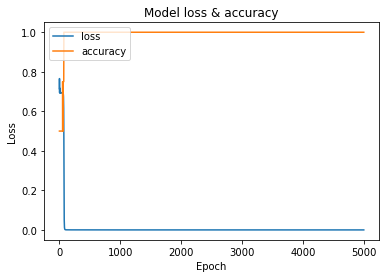

[1.0, 1.0, 1.0, 1.0, 1.0]


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()
print(history.history['accuracy'][-5:])

In [11]:
predictions = model.predict(x_data)
print('Prediction: \n', predictions)

Prediction: 
 [[2.9200914e-06]
 [9.9999940e-01]
 [9.9999940e-01]
 [2.9241687e-06]]


In [13]:
score = model.evaluate(x_data, y_data)
print('Accuracy: ', score[1])

1/1 [==============================] - 0s 1ms/step - loss: 1.7713e-06 - accuracy: 1.0000
Accuracy:  1.0
